## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

In [4]:
df = pd.read_csv("/Users/kushal/Downloads/Crime_Incidents.csv", low_memory=False)

In [5]:
df.head(5)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,location,hour_of_day,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks
0,707535288,15-0650868,03/06/2015 07:35:15 AM,ASSAULT,ASSAULT,NaN,HOPKINS @ GOOD,NaN,BUFFALO,NY,...,POINT (-78.818186333039 42.846887288511),7,Friday,Assault,6.0,4.0,9.0,71.0,211.0,126.0
1,901476393,19-0160417,01/04/2019 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,400 Block GOLD ST,NaN,BUFFALO,NY,...,POINT (-78.80519990642684 42.89630328831633),12,Friday,Theft,2.0,3.0,17.0,28.0,24.0,314.0
2,902552636,19-0220443,01/04/2019 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,1000 Block GENESEE ST,NaN,BUFFALO,NY,...,POINT (-78.8442581986752 42.901489184581514),12,Friday,Theft,5.0,3.0,4.0,26.0,8.0,3027.0
3,902969362,19-0250243,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,100 Block CULVER RD,NaN,BUFFALO,NY,...,POINT (-78.81745109743173 42.83980951202153),12,Sunday,Other Sexual Offense,6.0,4.0,9.0,74.0,83.0,535.0
4,902969363,19-0250244,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block VANDERBILT ST,NaN,BUFFALO,NY,...,POINT (-78.805856858726 42.89218618798844),12,Sunday,Other Sexual Offense,2.0,3.0,17.0,28.0,142.0,1305.0


In [6]:
df.columns, df.shape

(Index(['incident_id', 'case_number', 'incident_datetime',
        'incident_type_primary', 'incident_description', 'clearance_type',
        'address_1', 'address_2', 'city', 'state', 'zip', 'country', 'latitude',
        'longitude', 'created_at', 'updated_at', 'location', 'hour_of_day',
        'day_of_week', 'parent_incident_type', 'Council Districts',
        'Police Districts', 'Zip Codes', 'Tracts', 'Block Groups', 'Blocks'],
       dtype='object'), (254060, 26))

In [7]:
df['incident_type_primary'].unique()

array(['ASSAULT', 'LARCENY/THEFT', 'SEXUAL ABUSE', 'UUV', 'BURGLARY',
       'RAPE', 'ROBBERY', 'CRIM NEGLIGENT HOMICIDE', 'THEFT OF SERVICES',
       'MURDER', 'Breaking & Entering', 'Assault', 'Theft', 'Robbery',
       'Theft of Vehicle', 'AGG ASSAULT ON P/OFFICER',
       'Other Sexual Offense', 'Sexual Assault', 'Homicide',
       'AGGR ASSAULT', 'MANSLAUGHTER'], dtype=object)

In [8]:
df2 = df[df['incident_type_primary'].isin({'SEXUAL ABUSE', 'RAPE', 'Other Sexual Offense',
                                 'Sexual Assault'})]

In [9]:
df2.shape, df2['incident_type_primary'].unique()

((4723, 26),
 array(['SEXUAL ABUSE', 'RAPE', 'Other Sexual Offense', 'Sexual Assault'],
       dtype=object))

In [10]:
df2.head(20)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,location,hour_of_day,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks
3,902969362,19-0250243,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,100 Block CULVER RD,NaN,BUFFALO,NY,...,POINT (-78.81745109743173 42.83980951202153),12,Sunday,Other Sexual Offense,6.0,4.0,9.0,74.0,83.0,535.0
4,902969363,19-0250244,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block VANDERBILT ST,NaN,BUFFALO,NY,...,POINT (-78.805856858726 42.89218618798844),12,Sunday,Other Sexual Offense,2.0,3.0,17.0,28.0,142.0,1305.0
5,902969364,19-0250245,01/25/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,200 Block HEMPSTEAD AV,NaN,BUFFALO,NY,...,POINT (-78.80506119711333 42.9304922315033),12,Thursday,Other Sexual Offense,8.0,2.0,11.0,63.0,126.0,1522.0
6,902972631,19-0250450,01/25/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,300 Block 14TH ST,NaN,BUFFALO,NY,...,POINT (-78.8906598853704 42.91089527708419),12,Thursday,Other Sexual Offense,3.0,1.0,2.0,41.0,96.0,3296.0
7,901019637,19-0120374,01/09/2019 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block WAKEFIELD AV,NaN,BUFFALO,NY,...,POINT (-78.83565825907772 42.9342428518739),12,Wednesday,Other Sexual Offense,9.0,2.0,18.0,19.0,13.0,1373.0
12,863581115,18-1930718,07/12/2018 05:46:05 AM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,600 Block WEST AV,NaN,BUFFALO,NY,...,POINT (-78.89367244085649 42.90869205055514),5,Thursday,Other Sexual Offense,3.0,1.0,2.0,41.0,265.0,269.0
33,841581662,18-0930581,01/01/2016 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block 18TH ST,NaN,BUFFALO,NY,...,POINT (-78.88626351029279 42.91260819649175),12,Friday,Other Sexual Offense,3.0,1.0,2.0,40.0,210.0,2825.0
40,909584203,19-0680478,01/01/1963 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block ST LAWRENCE AV,NaN,BUFFALO,NY,...,POINT (-78.8508993 42.9560286),12,Tuesday,Other Sexual Offense,7.0,5.0,5.0,46.0,62.0,1189.0
55,864964914,18-2070828,04/01/2008 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,2700 Block BAILEY AV,NaN,BUFFALO,NY,...,POINT (-78.8133361 42.9302979),12,Tuesday,Other Sexual Offense,8.0,2.0,11.0,63.0,202.0,2686.0
59,841801356,18-0950229,04/01/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,700 Block NIAGARA ST,NaN,BUFFALO,NY,...,POINT (-78.89533484287695 42.905257687131325),12,Sunday,Other Sexual Offense,3.0,1.0,2.0,69.0,144.0,2657.0


In [11]:
df2.dropna()

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,location,hour_of_day,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks


In [12]:
df3 = df2.reset_index(drop = True)
df3.head()
#df3.shape

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,location,hour_of_day,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks
0,902969362,19-0250243,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,100 Block CULVER RD,NaN,BUFFALO,NY,...,POINT (-78.81745109743173 42.83980951202153),12,Sunday,Other Sexual Offense,6.0,4.0,9.0,74.0,83.0,535.0
1,902969363,19-0250244,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block VANDERBILT ST,NaN,BUFFALO,NY,...,POINT (-78.805856858726 42.89218618798844),12,Sunday,Other Sexual Offense,2.0,3.0,17.0,28.0,142.0,1305.0
2,902969364,19-0250245,01/25/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,200 Block HEMPSTEAD AV,NaN,BUFFALO,NY,...,POINT (-78.80506119711333 42.9304922315033),12,Thursday,Other Sexual Offense,8.0,2.0,11.0,63.0,126.0,1522.0
3,902972631,19-0250450,01/25/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,300 Block 14TH ST,NaN,BUFFALO,NY,...,POINT (-78.8906598853704 42.91089527708419),12,Thursday,Other Sexual Offense,3.0,1.0,2.0,41.0,96.0,3296.0
4,901019637,19-0120374,01/09/2019 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block WAKEFIELD AV,NaN,BUFFALO,NY,...,POINT (-78.83565825907772 42.9342428518739),12,Wednesday,Other Sexual Offense,9.0,2.0,18.0,19.0,13.0,1373.0


In [13]:
## Cleaning and splitting incident_datetime column into year and month

In [14]:
date_times = []
for num in range(df2.shape[0]):
    date_times.append(df2['incident_datetime'].iloc[num].split(" ", 2)[0])
date_times[:5]

['01/25/2015', '01/25/2015', '01/25/2018', '01/25/2018', '01/09/2019']

In [15]:
date_times_2 = pd.to_datetime(date_times,infer_datetime_format=True)

In [16]:
df3['year'] = date_times_2.year
df3['month'] = date_times_2.month

In [17]:
df3.head(5)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks,year,month
0,902969362,19-0250243,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,100 Block CULVER RD,NaN,BUFFALO,NY,...,Sunday,Other Sexual Offense,6.0,4.0,9.0,74.0,83.0,535.0,2015,1
1,902969363,19-0250244,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block VANDERBILT ST,NaN,BUFFALO,NY,...,Sunday,Other Sexual Offense,2.0,3.0,17.0,28.0,142.0,1305.0,2015,1
2,902969364,19-0250245,01/25/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,200 Block HEMPSTEAD AV,NaN,BUFFALO,NY,...,Thursday,Other Sexual Offense,8.0,2.0,11.0,63.0,126.0,1522.0,2018,1
3,902972631,19-0250450,01/25/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,300 Block 14TH ST,NaN,BUFFALO,NY,...,Thursday,Other Sexual Offense,3.0,1.0,2.0,41.0,96.0,3296.0,2018,1
4,901019637,19-0120374,01/09/2019 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block WAKEFIELD AV,NaN,BUFFALO,NY,...,Wednesday,Other Sexual Offense,9.0,2.0,18.0,19.0,13.0,1373.0,2019,1


In [18]:
df4 = df[df['incident_type_primary'].isin({'ASSAULT', 'LARCENY/THEFT',  'UUV', 'BURGLARY',
        'ROBBERY', 'CRIM NEGLIGENT HOMICIDE', 'THEFT OF SERVICES',
       'MURDER', 'Breaking & Entering', 'Assault', 'Theft', 'Robbery',
       'Theft of Vehicle', 'AGG ASSAULT ON P/OFFICER',
         'Homicide',
       'AGGR ASSAULT', 'MANSLAUGHTER'})]

In [19]:
df4.shape

(249337, 26)

In [20]:
df4.head(5)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,location,hour_of_day,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks
0,707535288,15-0650868,03/06/2015 07:35:15 AM,ASSAULT,ASSAULT,NaN,HOPKINS @ GOOD,NaN,BUFFALO,NY,...,POINT (-78.818186333039 42.846887288511),7,Friday,Assault,6.0,4.0,9.0,71.0,211.0,126.0
1,901476393,19-0160417,01/04/2019 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,400 Block GOLD ST,NaN,BUFFALO,NY,...,POINT (-78.80519990642684 42.89630328831633),12,Friday,Theft,2.0,3.0,17.0,28.0,24.0,314.0
2,902552636,19-0220443,01/04/2019 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,1000 Block GENESEE ST,NaN,BUFFALO,NY,...,POINT (-78.8442581986752 42.901489184581514),12,Friday,Theft,5.0,3.0,4.0,26.0,8.0,3027.0
8,854542298,18-1380353,03/01/2018 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,300 Block WALDEN AV,NaN,BUFFALO,NY,...,POINT (-78.82455864379337 42.90326103136154),12,Thursday,Theft,5.0,3.0,4.0,66.0,242.0,2301.0
9,894581032,18-3510529,11/20/2018 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block HUDSON ST,NaN,BUFFALO,NY,...,POINT (-78.87146383534977 42.89289047689623),12,Tuesday,Theft,4.0,1.0,14.0,77.0,31.0,914.0


In [21]:
df4['incident_datetime'].isnull().sum()

5

In [22]:
df5 = df4.reset_index(drop = True)
np.where(df5['incident_datetime'].isnull() == True)[0]
df6 = df5.drop(np.where(df5['incident_datetime'].isnull() == True)[0], axis = 0)

In [23]:
df6.shape, df5.shape

((249332, 26), (249337, 26))

In [24]:
df6['incident_datetime'].isnull().sum()

0

In [25]:
date_times = []
for num in range(df6.shape[0]):
    date_times.append(df6['incident_datetime'].iloc[num].split(" ", 2)[0])
date_times[:5]

['03/06/2015', '01/04/2019', '01/04/2019', '03/01/2018', '11/20/2018']

In [26]:
date_times_2 = pd.to_datetime(date_times,infer_datetime_format=True)

In [27]:
df6['year'] = date_times_2.year
df6['month'] = date_times_2.month

In [28]:
df6.head(5)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks,year,month
0,707535288,15-0650868,03/06/2015 07:35:15 AM,ASSAULT,ASSAULT,NaN,HOPKINS @ GOOD,NaN,BUFFALO,NY,...,Friday,Assault,6.0,4.0,9.0,71.0,211.0,126.0,2015,3
1,901476393,19-0160417,01/04/2019 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,400 Block GOLD ST,NaN,BUFFALO,NY,...,Friday,Theft,2.0,3.0,17.0,28.0,24.0,314.0,2019,1
2,902552636,19-0220443,01/04/2019 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,1000 Block GENESEE ST,NaN,BUFFALO,NY,...,Friday,Theft,5.0,3.0,4.0,26.0,8.0,3027.0,2019,1
3,854542298,18-1380353,03/01/2018 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,300 Block WALDEN AV,NaN,BUFFALO,NY,...,Thursday,Theft,5.0,3.0,4.0,66.0,242.0,2301.0,2018,3
4,894581032,18-3510529,11/20/2018 12:00:00 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block HUDSON ST,NaN,BUFFALO,NY,...,Tuesday,Theft,4.0,1.0,14.0,77.0,31.0,914.0,2018,11


In [118]:
## Subsetting only sexual crimes data 

In [29]:
sub_df1= df3[['year','incident_type_primary']]

In [30]:
sub_df1

,year,incident_type_primary
0,2015,SEXUAL ABUSE
1,2015,SEXUAL ABUSE
2,2018,SEXUAL ABUSE
3,2018,SEXUAL ABUSE
4,2019,SEXUAL ABUSE
5,2018,SEXUAL ABUSE
6,2016,SEXUAL ABUSE
7,1963,SEXUAL ABUSE
8,2008,SEXUAL ABUSE
9,2018,SEXUAL ABUSE


In [31]:
grouped= sub_df1.groupby(['year','incident_type_primary']).groups
grouped

{(1963, 'SEXUAL ABUSE'): Int64Index([7], dtype='int64'),
 (1967, 'SEXUAL ABUSE'): Int64Index([40], dtype='int64'),
 (1976, 'RAPE'): Int64Index([156], dtype='int64'),
 (1978, 'SEXUAL ABUSE'): Int64Index([215], dtype='int64'),
 (1983, 'RAPE'): Int64Index([2082], dtype='int64'),
 (1992, 'SEXUAL ABUSE'): Int64Index([688], dtype='int64'),
 (1993, 'RAPE'): Int64Index([2083], dtype='int64'),
 (1996, 'RAPE'): Int64Index([689, 690, 2084, 2085], dtype='int64'),
 (1996, 'SEXUAL ABUSE'): Int64Index([741, 2086], dtype='int64'),
 (1998, 'RAPE'): Int64Index([693, 2088], dtype='int64'),
 (1998, 'SEXUAL ABUSE'): Int64Index([694, 695, 742, 2087], dtype='int64'),
 (1999, 'SEXUAL ABUSE'): Int64Index([42, 696, 2089], dtype='int64'),
 (2000, 'RAPE'): Int64Index([743, 2093], dtype='int64'),
 (2000, 'SEXUAL ABUSE'): Int64Index([2090, 2091, 2092], dtype='int64'),
 (2001, 'RAPE'): Int64Index([2095, 2097], dtype='int64'),
 (2001, 'SEXUAL ABUSE'): Int64Index([2094, 2096, 2098], dtype='int64'),
 (2002, 'RAPE'): In

In [32]:
sub_df1['incident_type_primary'].unique()

array(['SEXUAL ABUSE', 'RAPE', 'Other Sexual Offense', 'Sexual Assault'],
      dtype=object)

In [33]:
incident_type_primary_counts= sub_df1['incident_type_primary'].value_counts()
incident_type_primary_counts

RAPE                    2483
SEXUAL ABUSE            2233
Sexual Assault             5
Other Sexual Offense       2
Name: incident_type_primary, dtype: int64

In [34]:
sub_df1['year'].unique()

array([2015, 2018, 2019, 2016, 1963, 2008, 2014, 2009, 2004, 2017, 1967,
       1999, 2006, 2010, 1976, 1978, 2013, 2011, 2012, 2007, 2002, 2003,
       1992, 1996, 1998, 2005, 2000, 1983, 1993, 2001])

In [35]:
year_counts= sub_df1['year'].value_counts()
year_counts

2007    382
2009    380
2006    379
2010    359
2015    337
2018    329
2016    326
2011    320
2014    312
2017    308
2012    308
2013    297
2008    290
2019    275
2005     41
2004     25
2003     14
2002      9
1998      6
1996      6
2000      5
2001      5
1999      3
1992      1
1978      1
1993      1
1963      1
1967      1
1983      1
1976      1
Name: year, dtype: int64

In [119]:
## Boxplot showing the sexual crime incidents and the corresponding years

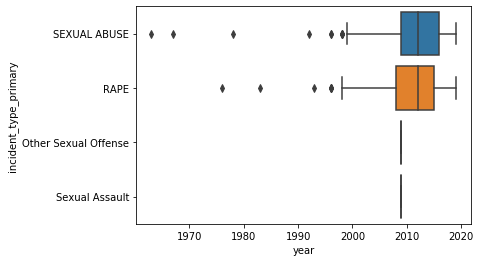

In [120]:
sns.boxplot(x='year', y = 'incident_type_primary', data = sub_df1)

In [121]:
## Subsetting nonsexual crime data

In [37]:
sub_df2= df6[['year','incident_type_primary']]
sub_df2

,year,incident_type_primary
0,2015,ASSAULT
1,2019,LARCENY/THEFT
2,2019,LARCENY/THEFT
3,2018,LARCENY/THEFT
4,2018,LARCENY/THEFT
5,2018,LARCENY/THEFT
6,2018,LARCENY/THEFT
7,2017,LARCENY/THEFT
8,2014,UUV
9,2018,LARCENY/THEFT


In [38]:
sub_df2['year'].unique()

array([2015, 2019, 2018, 2017, 2014, 2016, 2008, 2005, 2013, 2009, 2011,
       2010, 2004, 2007, 2003, 2012, 2002, 1951, 2006, 1989, 1978, 1914,
       1960, 1970, 1984, 1987, 1990, 2000, 2001, 1910, 1952, 1961, 1962,
       1963, 1967, 1972, 1979, 1980, 1981, 1985, 1986, 1988, 1991, 1992,
       1993, 1994, 1995, 1996, 1999])

In [39]:
year_counts= sub_df2['year'].value_counts()
year_counts

2007    21575
2009    21453
2010    21348
2012    20302
2011    20152
2006    19067
2013    18353
2014    17206
2015    16930
2016    16123
2018    15126
2017    15089
2008    13244
2019    12862
2005      274
2000       51
2004       45
2003       33
2002       24
2001       21
1970        5
1960        4
1990        4
1981        3
1978        2
1995        2
1967        2
1963        2
1961        2
1986        2
1985        2
1951        2
1989        2
1999        2
1996        2
1988        2
1993        2
1987        1
1994        1
1952        1
1962        1
1910        1
1972        1
1992        1
1979        1
1980        1
1991        1
1984        1
1914        1
Name: year, dtype: int64

In [40]:
df_crimes= {'Year': [2007,2009,2006,2010,2015,2018,2016,2011,2014,2017,2012,2013,2008,2019,2005,2004,2003,2002,
                          1998,1996,2000,2001,1999,1992,1978,1993,1963,1967,1983,1976],
                 'Sexualcrime_counts': [382,380,379,359,337,329,326,320,312,308,308,297,290,275,41,25,14,9,6,6,5,5,3,1,1,1,1,1,
                                1,1],
                 'Nonsexualcrime_counts': [21575,21453,19067,21348,16930,15126,16123,20152,17206,15089,20302,
                                              18353,13244,12862,274,45,33,24,6,6,51,21,2,2,2,1,1,1,1,1]}

In [122]:
## Dataframe with year, sexual and nonsexual crimes

In [41]:
df_new1 = pd.DataFrame(df_crimes)
df_new1

,Year,Sexualcrime_counts,Nonsexualcrime_counts
0,2007,382,21575
1,2009,380,21453
2,2006,379,19067
3,2010,359,21348
4,2015,337,16930
5,2018,329,15126
6,2016,326,16123
7,2011,320,20152
8,2014,312,17206
9,2017,308,15089


In [42]:
df_new1_sorted= df_new1.sort_values(['Year'])

In [43]:
df_new1_sorted1= df_new1_sorted.reset_index(drop = True)
df_new1_sorted1

,Year,Sexualcrime_counts,Nonsexualcrime_counts
0,1963,1,1
1,1967,1,1
2,1976,1,1
3,1978,1,2
4,1983,1,1
5,1992,1,2
6,1993,1,1
7,1996,6,6
8,1998,6,6
9,1999,3,2


In [44]:
df_new1_sorted_proportionality= df_new1_sorted1['Sexualcrime_counts']/ df_new1_sorted1['Nonsexualcrime_counts']

In [45]:
df_new1_sorted1['Proportion'] = df_new1_sorted_proportionality


Since the data doesn't look stable from 1963 to 2009, therefore I am considering the last decade's data that is from 2010 to 2019. We do observe that with increase in time from 2006 to 2019 mostly nonsexual crimes decreased and there's no exact pattern for sexual crimes. As a result, proportionality increases with increase in time. Below are some plots to have better understanding of this.

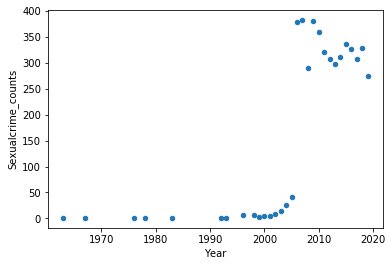

In [46]:
df_new1_sorted1.plot.scatter(x = 'Year', y = 'Sexualcrime_counts')


The above scatterplot signifies that sexual crimes kind of increased approximately from 2007 onwards.

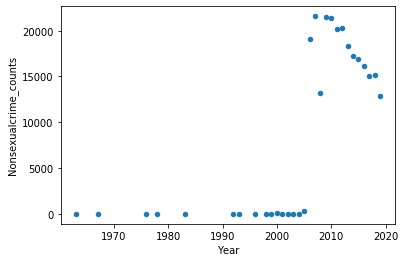

In [47]:
df_new1_sorted1.plot.scatter(x = 'Year', y = 'Nonsexualcrime_counts')

The scatterplot shows thats even nonsexual crimes increased from 2007 onwards. However, there's a sharp decrease of nonsexual crime incident around 2019.

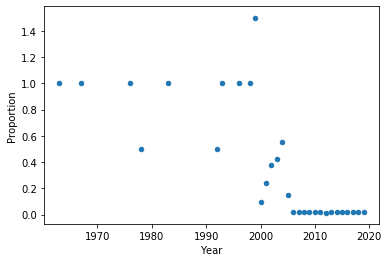

In [48]:
df_new1_sorted1.plot.scatter(x = 'Year', y = 'Proportion')

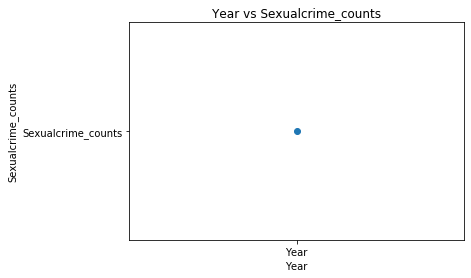

In [49]:
plt.scatter(x = 'Year', y = 'Sexualcrime_counts')
plt.title('Year vs Sexualcrime_counts')
plt.xlabel('Year')
plt.ylabel('Sexualcrime_counts')
plt.show()

In [50]:
df_new11= df_new1_sorted1.loc[np.where(df_new1_sorted1['Year'] > 2009)]
df_new11

,Year,Sexualcrime_counts,Nonsexualcrime_counts,Proportion
20,2010,359,21348,0.016817
21,2011,320,20152,0.015879
22,2012,308,20302,0.015171
23,2013,297,18353,0.016183
24,2014,312,17206,0.018133
25,2015,337,16930,0.019905
26,2016,326,16123,0.020220
27,2017,308,15089,0.020412
28,2018,329,15126,0.021751
29,2019,275,12862,0.021381


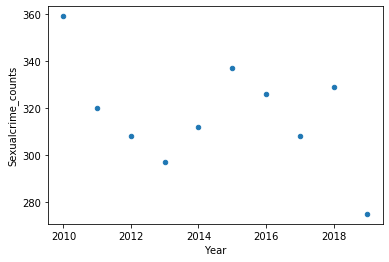

In [51]:
df_new11.plot.scatter(x = 'Year', y = 'Sexualcrime_counts')

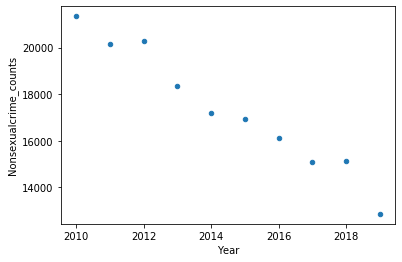

In [52]:
df_new11.plot.scatter(x = 'Year', y = 'Nonsexualcrime_counts')

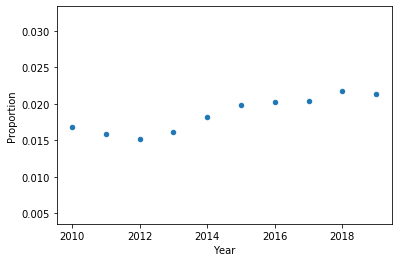

In [53]:
df_new11.plot.scatter(x = 'Year', y = 'Proportion')

Here we see nonsexual crimes decreased over the period of time however sexual crimes almost varies and there is no specific pattern of sexual crimes.

In [54]:
df3.head()

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks,year,month
0,902969362,19-0250243,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,100 Block CULVER RD,NaN,BUFFALO,NY,...,Sunday,Other Sexual Offense,6.0,4.0,9.0,74.0,83.0,535.0,2015,1
1,902969363,19-0250244,01/25/2015 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block VANDERBILT ST,NaN,BUFFALO,NY,...,Sunday,Other Sexual Offense,2.0,3.0,17.0,28.0,142.0,1305.0,2015,1
2,902969364,19-0250245,01/25/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,200 Block HEMPSTEAD AV,NaN,BUFFALO,NY,...,Thursday,Other Sexual Offense,8.0,2.0,11.0,63.0,126.0,1522.0,2018,1
3,902972631,19-0250450,01/25/2018 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,300 Block 14TH ST,NaN,BUFFALO,NY,...,Thursday,Other Sexual Offense,3.0,1.0,2.0,41.0,96.0,3296.0,2018,1
4,901019637,19-0120374,01/09/2019 12:00:00 PM,SEXUAL ABUSE,Buffalo Police are investigating this report o...,NaN,1 Block WAKEFIELD AV,NaN,BUFFALO,NY,...,Wednesday,Other Sexual Offense,9.0,2.0,18.0,19.0,13.0,1373.0,2019,1


In [55]:
df3['incident_type_primary'].unique()

array(['SEXUAL ABUSE', 'RAPE', 'Other Sexual Offense', 'Sexual Assault'],
      dtype=object)

In [56]:
incident_type_primary_counts= df3['incident_type_primary'].value_counts()
incident_type_primary_counts

RAPE                    2483
SEXUAL ABUSE            2233
Sexual Assault             5
Other Sexual Offense       2
Name: incident_type_primary, dtype: int64

Certainly, from the above analysis we can say the value counts of rape is the maximum in comparison to other sexual crimes.

In [57]:
year_counts= df3['year'].value_counts()
year_counts

2007    382
2009    380
2006    379
2010    359
2015    337
2018    329
2016    326
2011    320
2014    312
2017    308
2012    308
2013    297
2008    290
2019    275
2005     41
2004     25
2003     14
2002      9
1998      6
1996      6
2000      5
2001      5
1999      3
1992      1
1978      1
1993      1
1963      1
1967      1
1983      1
1976      1
Name: year, dtype: int64

In [58]:
df_filtered_rapes = df3['incident_type_primary']=="RAPE"
df_filtered_rapes

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10       True
11      False
12      False
13       True
14      False
15      False
16      False
17       True
18       True
19      False
20       True
21      False
22      False
23      False
24       True
25      False
26      False
27      False
28      False
29      False
        ...  
4693     True
4694     True
4695    False
4696     True
4697     True
4698     True
4699    False
4700     True
4701    False
4702    False
4703     True
4704    False
4705    False
4706    False
4707    False
4708    False
4709     True
4710     True
4711     True
4712     True
4713    False
4714     True
4715    False
4716    False
4717    False
4718    False
4719    False
4720    False
4721     True
4722     True
Name: incident_type_primary, Length: 4723, dtype: bool

In [59]:
df_new_filtered_RAPES= df3.loc[np.where(df3['incident_type_primary'] == "RAPE")]
df_new_filtered_RAPES

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,day_of_week,parent_incident_type,Council Districts,Police Districts,Zip Codes,Tracts,Block Groups,Blocks,year,month
10,841775743,18-0950045,04/05/2018 01:14:00 AM,RAPE,Buffalo Police are investigating this report o...,NaN,200 Block LISBON AV,NaN,BUFFALO,NY,...,Thursday,Sexual Assault,8.0,2.0,11.0,56.0,257.0,3045.0,2018,4
13,854676362,18-1400345,05/20/2018 11:02:00 AM,RAPE,Buffalo Police are investigating this report o...,NaN,E DELAVAN AV & PANSY PL,NaN,BUFFALO,NY,...,Sunday,Sexual Assault,9.0,2.0,22.0,59.0,4.0,185.0,2018,5
17,856061873,18-1520133,05/22/2018 11:00:00 AM,RAPE,Buffalo Police are investigating this report o...,NaN,700 Block DELAWARE AV,NaN,BUFFALO,NY,...,Tuesday,Sexual Assault,4.0,1.0,21.0,52.0,137.0,2752.0,2018,5
18,865069659,18-2080906,07/27/2018 08:40:21 AM,RAPE,Buffalo Police are investigating this report o...,NaN,400 Block FILLMORE AV,NaN,BUFFALO,NY,...,Friday,Sexual Assault,5.0,3.0,17.0,34.0,33.0,2753.0,2018,7
20,913853985,19-1040578,04/14/2019 03:21:00 AM,RAPE,Buffalo Police are investigating this report o...,NaN,2400 Block DELAWARE AV,NaN,BUFFALO,NY,...,Sunday,Sexual Assault,1.0,5.0,5.0,70.0,85.0,534.0,2019,4
24,860619999,18-1720099,06/21/2018 02:50:00 AM,RAPE,Buffalo Police are investigating this report o...,NaN,1 Block HAMILTON ST,NaN,BUFFALO,NY,...,Thursday,Sexual Assault,1.0,5.0,10.0,72.0,138.0,3268.0,2018,6
31,862029783,18-1860247,02/17/2017 09:00:00 AM,RAPE,Buffalo Police are investigating this report o...,NaN,PERRY PROJECTS ST,NaN,BUFFALO,NY,...,Friday,Sexual Assault,6.0,4.0,19.0,22.0,120.0,1097.0,2017,2
34,842810948,18-1050739,04/15/2018 08:51:14 AM,RAPE,Buffalo Police are investigating this report o...,NaN,200 Block BLAINE AV,NaN,BUFFALO,NY,...,Sunday,Sexual Assault,9.0,2.0,22.0,33.0,89.0,442.0,2018,4
35,868246685,18-2360407,07/29/2018 05:00:00 AM,RAPE,Buffalo Police are investigating this report o...,NaN,1 Block RAWLINS AV,NaN,BUFFALO,NY,...,Sunday,Sexual Assault,5.0,3.0,4.0,18.0,81.0,2333.0,2018,7
39,880236184,18-2800540,10/07/2018 03:26:00 AM,RAPE,Buffalo Police are investigating this report o...,NaN,100 Block 14TH ST,NaN,BUFFALO,NY,...,Sunday,Sexual Assault,3.0,1.0,2.0,17.0,178.0,2772.0,2018,10


In [60]:
df_new_filtered_RAPES['address_1'].unique()

array(['200 Block LISBON AV', 'E DELAVAN AV & PANSY PL',
       '700 Block DELAWARE AV', ..., '100 Block WESTON AV',
       '100 Block GRAPE ST', 'RHODE ISLAND ST & NORMAL AV'], dtype=object)

In [61]:
year_new_counts1=df_new_filtered_RAPES ['year'].value_counts().sort_index()
year_new_counts1

1976      1
1983      1
1993      1
1996      4
1998      2
2000      2
2001      2
2002      2
2003      2
2004     12
2005     20
2006    210
2007    224
2008    156
2009    217
2010    205
2011    152
2012    179
2013    176
2014    171
2015    177
2016    169
2017    148
2018    143
2019    107
Name: year, dtype: int64

In [62]:
df_new_filtered_Sexualabuse= df3.loc[np.where(df3['incident_type_primary'] == "SEXUAL ABUSE")]
year_new_counts3=df_new_filtered_Sexualabuse ['year'].value_counts().sort_index()
year_new_counts3


1963      1
1967      1
1978      1
1992      1
1996      2
1998      4
1999      3
2000      3
2001      3
2002      7
2003     12
2004     13
2005     21
2006    169
2007    158
2008    134
2009    156
2010    154
2011    168
2012    129
2013    121
2014    141
2015    160
2016    157
2017    160
2018    186
2019    168
Name: year, dtype: int64

In [63]:
df_sexualcrimes_final1= {'Year': [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],
                 'Sexualabuse_counts': [154,168,129,121,141,160,157,160,186,168],
                 'Rapes_counts': [205,152,179,176,171,177,169,148,143,107]}

In [64]:
df_sexualcrimes_final_1 = pd.DataFrame(df_sexualcrimes_final1)
df_sexualcrimes_final_1

,Year,Sexualabuse_counts,Rapes_counts
0,2010,154,205
1,2011,168,152
2,2012,129,179
3,2013,121,176
4,2014,141,171
5,2015,160,177
6,2016,157,169
7,2017,160,148
8,2018,186,143
9,2019,168,107


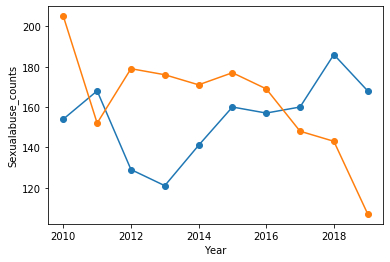

In [65]:
fig,ax=plt.subplots()
ax.plot(df_sexualcrimes_final_1.Year,df_sexualcrimes_final_1.Sexualabuse_counts, marker="o")
ax.set_xlabel("Year")
ax.set_ylabel("Sexualabuse_counts")
ax.plot(df_sexualcrimes_final_1.Year, df_sexualcrimes_final_1["Rapes_counts"], marker="o")
plt.show()




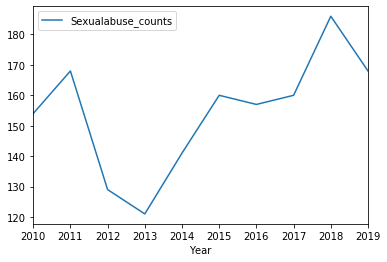

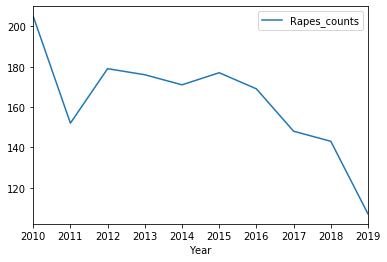

In [66]:
df_sexualcrimes_final_1.plot(x='Year', y='Sexualabuse_counts' )
df_sexualcrimes_final_1.plot(x='Year', y='Rapes_counts' )


Here we fitted a linear regression model to find the intercept values in order to see whether the variables are positively correlated or negatively correlated. Along with this, we computed the stats model.

In [67]:
from sklearn.linear_model import LinearRegression
X_train= df_sexualcrimes_final_1['Year']
y_train= df_sexualcrimes_final_1['Sexualabuse_counts']
X_train = np.array(X_train).reshape(-1, 1)
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)
print(regressor.coef_)

[3.23636364]


In [68]:
import statsmodels.api as sm
mod = sm.OLS(y_train,sm.add_constant(X_train))
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values
fii.summary2()

/Users/kushal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS                Adj. R-squared:     0.163  
Dependent Variable: Sexualabuse_counts AIC:                87.6504
Date:               2020-02-02 20:34   BIC:                88.2556
No. Observations:   10                 Log-Likelihood:     -41.825
Df Model:           1                  F-statistic:        2.749  
Df Residuals:       8                  Prob (F-statistic): 0.136  
R-squared:          0.256              Scale:              314.29 
------------------------------------------------------------------
           Coef.     Std.Err.    t    P>|t|     [0.025     0.975] 
------------------------------------------------------------------
const    -6365.2545 3931.9095 -1.6189 0.1441 -15432.2540 2701.7449
x1           3.2364    1.9518  1.6581 0.1359     -1.2645    7.7372
------------------------------------------------------------------
Omnibus:              0.083        Durbin-Watson:          1.417  
Prob(Omnibus):        0.959        Jarque-Bera (JB):       0.303  
Skew:                 -0.085       Prob(JB):               0.860  
Kurtosis:             2.165        Condition No.:          1412891
==================================================================
* The condition number is large (1e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [69]:
from sklearn.linear_model import LinearRegression
X_train= df_sexualcrimes_final_1['Year']
y_train= df_sexualcrimes_final_1['Rapes_counts']
X_train = np.array(X_train).reshape(-1, 1)
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)
print(regressor.coef_)

[-6.75757576]


In [70]:
import statsmodels.api as sm
mod = sm.OLS(y_train,sm.add_constant(X_train))
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values
fii.summary2()

/Users/kushal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.541  
Dependent Variable: Rapes_counts     AIC:                87.9808
Date:               2020-02-02 20:34 BIC:                88.5860
No. Observations:   10               Log-Likelihood:     -41.990
Df Model:           1                F-statistic:        11.60  
Df Residuals:       8                Prob (F-statistic): 0.00928
R-squared:          0.592            Scale:              324.84 
----------------------------------------------------------------
          Coef.     Std.Err.    t    P>|t|    [0.025    0.975]  
----------------------------------------------------------------
const   13775.8364 3997.4047  3.4462 0.0087 4557.8045 22993.8682
x1         -6.7576    1.9843 -3.4055 0.0093  -11.3334    -2.1817
----------------------------------------------------------------
Omnibus:              4.054       Durbin-Watson:         1.739  
Prob(Omnibus):        0.132       Jarque-Bera (JB):      1.911  
Skew:                 -1.070      Prob(JB):              0.385  
Kurtosis:             2.951       Condition No.:         1412891
================================================================
* The condition number is large (1e+06). This might indicate
strong multicollinearity or other numerical problems.
"""